In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv1D, MaxPooling1D, Dropout, Flatten, Dense


# Load prepared data

In [5]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

## fmap mean all experiments

In [6]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [7]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


## 55 fmap means

In [9]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [10]:
file_name = save_path+"fmap_mean_55.txt"
columns = ['exp', 'mini_exp', 'i', 'j', 'k']
for i in range(len(col)): 
    columns.append(col[i])
columns.append('theory')
data = np.loadtxt(file_name);

In [11]:
df_55 = pd.DataFrame(data, columns=columns)
df_55 = df_55.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df_55

,exp,mini_exp,i,j,k,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,...,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_55.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 61 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   4_2m1     float64
 6   4_3m2     float64
 7   4_4m3     float64
 8   4_5m4     float64
 9   4_6m5     float64
 10  4_7m6     float64
 11  4_8m7     float64
 12  4_9m8     float64
 13  4_10m9    float64
 14  4_11m10   float64
 15  4_12m11   float64
 16  6_2m1     float64
 17  6_3m2     float64
 18  6_4m3     float64
 19  6_5m4     float64
 20  6_6m5     float64
 21  6_7m6     float64
 22  6_8m7     float64
 23  6_9m8     float64
 24  6_10m9    float64
 25  6_11m10   float64
 26  6_12m11   float64
 27  8_2m1     float64
 28  8_3m2     float64
 29  8_4m3     float64
 30  8_5m4     float64
 31  8_6m5     float64
 32  8_7m6     float64
 33  8_8m7     float64
 34  8_9m8     float64
 35  8_10m9    float64
 36  8_11m10 

## Only +ON and -ON

In [18]:
file_name = save_path+"fmap_on.txt"
columns =['exp', 'mini_exp', 'run', 'i', 'j', 'k', 'off', 'on', 'theory']
data = np.loadtxt(file_name);

In [19]:
df_on = pd.DataFrame(data, columns=columns)
df_on = df_on.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "run":int})
df_on

,exp,mini_exp,run,i,j,k,off,on,theory
0,36,1,1,0,0,0,0.0,0.0,0.0
1,36,1,1,0,0,1,0.0,0.0,0.0
2,36,1,1,0,0,2,0.0,0.0,0.0
3,36,1,1,0,0,3,0.0,0.0,0.0
4,36,1,1,0,0,4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6488059,38,6,-1,43,63,59,0.0,0.0,0.0
6488060,38,6,-1,43,63,60,0.0,0.0,0.0
6488061,38,6,-1,43,63,61,0.0,0.0,0.0
6488062,38,6,-1,43,63,62,0.0,0.0,0.0


In [20]:
df_on.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6488064 entries, 0 to 6488063
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   run       int64  
 3   i         int64  
 4   j         int64  
 5   k         int64  
 6   off       float64
 7   on        float64
 8   theory    float64
dtypes: float64(3), int64(6)
memory usage: 445.5 MB


# Split data

## Data 1. fmap mean all experiments

In [14]:
X = df.iloc[:, 5:-1].values  
y = df['theory'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [15]:
print(X.shape)
print(y.shape)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(3244032, 5)
(3244032,)
(2270822, 5)
(2270822,)
(973210, 5)
(973210,)


## Data2: One experiment

In [16]:
df_train = df[(df['exp']==38) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==38) & (df['mini_exp']==6)]

In [17]:
df_train.iloc[:, 5:-1]

,mean0,mean1,mean2,mean3,mean4
2162688,0.0,0.0,0.0,0.0,0.0
2162689,0.0,0.0,0.0,0.0,0.0
2162690,0.0,0.0,0.0,0.0,0.0
2162691,0.0,0.0,0.0,0.0,0.0
2162692,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3063803,0.0,0.0,0.0,0.0,0.0
3063804,0.0,0.0,0.0,0.0,0.0
3063805,0.0,0.0,0.0,0.0,0.0
3063806,0.0,0.0,0.0,0.0,0.0


In [18]:
X2_train = df_train.iloc[:, 5:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 5:-1].values
y2_test = df_test['theory'].values

In [19]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


## Data3: 55 fmap means

In [20]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [21]:
X = df_55.iloc[:, 5:-1].values 
y = df_55['theory'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [22]:
print(X.shape)
print(y.shape)
print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(3244032, 55)
(3244032,)
(2270822, 55)
(2270822,)
(973210, 55)
(973210,)


## Data4: Only +ON and -ON

In [29]:
X = df_on.iloc[:, 2:-1].values  # include i,j,k
y = df_on['theory'].values

X4_train, X4_test, y4_train, y4_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [30]:
print(X.shape)
print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)

(6488064, 6)
(6488064,)
(4541644, 6)
(4541644,)
(1946420, 6)
(1946420,)


# Convolutional Neural Network

## Data1: 5 fmap means

In [26]:
# Reshape the data
X_train = X1_train.reshape(X1_train.shape[0], X1_train.shape[1], 1)
X_test = X1_test.reshape(X1_test.shape[0], X1_test.shape[1], 1)
y_train = y1_train
y_test = y1_test

In [27]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

In [ ]:
model = keras.Sequential()

model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks =myCallbacks)

Epoch 1/100
70964/70964 [==============================] - 105s 1ms/step - loss: 35.9326 - accuracy: 0.3764 - val_loss: 36.8169 - val_accuracy: 0.8084
Epoch 2/100
10496/70964 [===>..........................] - ETA: 1:17 - loss: 33.1198 - accuracy: 0.8074

In [ ]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

In [ ]:
np.corrcoef(test_pred.flatten(),y_test)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.summary()

In [ ]:
history.history

## Data2: One experiments

In [ ]:
# Reshape the data
X_train = X2_train.reshape(X2_train.shape[0], X2_train.shape[1], 1)
X_test = X2_test.reshape(X2_test.shape[0], X2_test.shape[1], 1)
y_train = y2_train
y_test = y2_test

In [ ]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

In [ ]:
model = keras.Sequential()

# model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
# model.add(Flatten())
# model.add(Dense(64, activation="relu"))
# model.add(Dense(1))
# Coef 0.415, MSE 86.28, MAPE 1.15, Accuracy 0.8064

model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
# Coef 0.648 MSE 58.52, MAPE 0.91, Accuracy 0.8064 => Best
    
    
# model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.1))
# model.add(Dense(10, activation="relu"))
# model.add(Dense(5, activation="relu"))
# model.add(Dense(1))
# # Coef 0.5099, MSE 74.244, MAPE 0.9068, Accuracy 0.8064

# model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.1))
# model.add(Dense(10, activation="relu"))
# model.add(Dense(1))
# # Coef 0.5049, MSE 71.10 MAPE 1.047, Accuracy 0.8064

# model.add(Conv1D(32, 2, activation ="relu", input_shape=(len(X_train[0]), 1)))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(64, 2, activation ="relu"))
# model.add(MaxPooling1D(1))
# model.add(Flatten())
# model.add(Dense(64, activation ="relu"))
# model.add(Dense(20, activation="relu"))
# model.add(Dense(1))
# # Coef 0.5585, MSE 70.26, MAPE 0.8898, Accuracy 0.8065


# model.add(Conv1D(64, 8, padding='same', input_shape=(len(X_train[0]), 1), activation='relu'))
# model.add(MaxPooling1D(2, padding='same'))
# model.add(Conv1D(64, 8, padding='same', activation='relu'))
# model.add(MaxPooling1D(2, padding='same'))
# model.add(Conv1D(32, 8, padding='same', activation='relu'))
# model.add(Conv1D(1, 8, padding='same', activation='tanh'))
# Accuracy 5.5487e-06


model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks =[myCallbacks])


In [ ]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

In [ ]:
np.corrcoef(test_pred.flatten(),y_test)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.summary()

In [ ]:
history.history

## Plot

### Loss function (MSE)

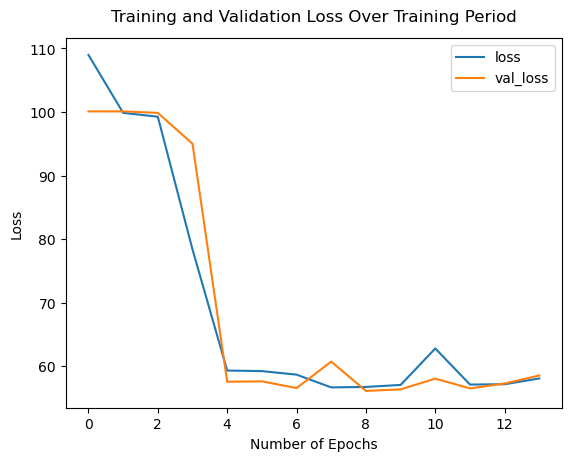

In [112]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

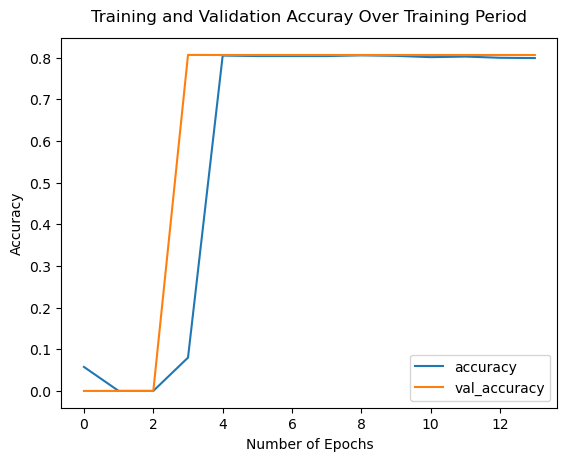

In [113]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.64805%, st_er: 0.001281%
y = 0.4627*x + 1.3068


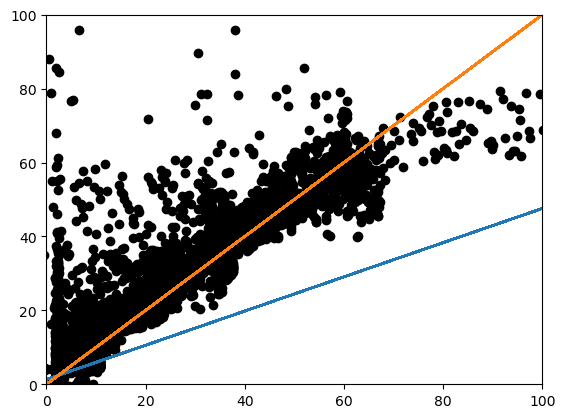

In [114]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output image data

In [115]:
df_test['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_72933/4195812830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred


In [120]:
np.savetxt(save_path+"cnn.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

## Data3: 55 fmap

In [ ]:
# Reshape the data
X_train = X3_train.reshape(X3_train.shape[0], X3_train.shape[1], 1)
X_test = X3_test.reshape(X3_test.shape[0], X3_test.shape[1], 1)
y_train = y3_train
y_test = y3_test

In [ ]:
model = keras.Sequential()

model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks =[myCallbacks])


In [ ]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

In [ ]:
np.corrcoef(test_pred.flatten(),y_test)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.summary()

In [ ]:
history.history